# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [3]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np



In [40]:
df1 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df1

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

Antes veremos los datos si hay nulos o duplicados

In [38]:
def explorar_df(df):
    print(df.info())

    print('Describe()')
    print(df.describe(include='all').T)

    print('Nulos')
    nulos = df.isnull().sum()
    print(nulos[nulos > 0] if nulos.any() else 'Notnnull')

    print('Duplicados')
    print(df.duplicated().sum())
    
    print('Tamaño')
    print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")

In [94]:
explorar_df(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB
None
Describe()
            count unique        top freq      mean        std   min    25%  \
Name          799    799  Bulbasaur    1       NaN        NaN   NaN    NaN   
Type 1        800     18      Water  112       NaN        NaN   NaN    NaN   
Type 2        414     18     Flying   97       NaN        NaN   N

In [99]:
df1["HP"].describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

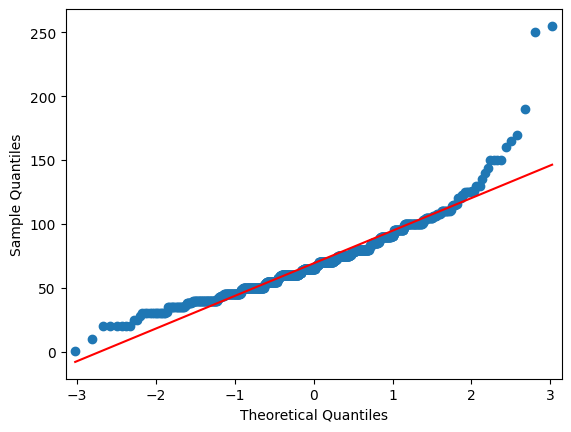

In [ ]:
import statsmodels.api as sm


sm.qqplot(df1['HP'], line='s');

se comporta de manera normal haci que haremos las pruebas paramétricas

Hipotesis H0: Pokémon de tipo Dragón tienen, en promedio, menor o igual HP que los de tipo Planta
Hipotesis H1: Pokémon de tipo Dragón tienen, en promedio, más HP que los de tipo Planta

significancia α = 0.05

al ser dos variables independientes usaremos t-test de Student

In [90]:
muestra1 = df1[(df1['Type 1'] == 'Dragon') | (df1['Type 2'] == 'Dragon')]['HP']
muestra2 = df1[(df1['Type 1'] == 'Grass') | (df1['Type 2'] == 'Grass')]['HP']

In [91]:
resultado = st.ttest_ind(muestra1, muestra2, equal_var=False)

In [92]:
print(f"p-valor: {resultado.pvalue}")

p-valor: 0.00010181538122353856


Como el valor es menor que 0.05, rechazamos la hipótesis nula. Concluimos que los Pokémon de tipo Dragón tienen más HP que los de tipo Planta.

- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


Hipotesis H0: Los Pokémon Legendarios tienen estadísticas diferentes (HP, Ataque, Defensa, Ataque Especial, Defensa Especial, Velocidad) en comparación con los No Legendarios.
Hipotesis H1: Los Pokémon Legendarios no tienen estadísticas diferentes (HP, Ataque, Defensa, Ataque Especial, Defensa Especial, Velocidad) en comparación con los No Legendarios.

significancia α = 0.05


veamos los legendarios y los no legendarios

In [89]:
for stat in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    resultado = st.ttest_ind(
        df1[df1['Legendary'] == True][stat],
        df1[df1['Legendary'] == False][stat],
        equal_var=False
    )
    print(f"{stat}: p-value = {resultado.pvalue}")

HP: p-value = 1.002691170803531e-13
Attack: p-value = 2.52037244923666e-16
Defense: p-value = 4.82699849491934e-11
Sp. Atk: p-value = 1.551461411223974e-21
Sp. Def: p-value = 2.2949327864052925e-15
Speed: p-value = 1.0490163118824546e-18


Como el valor es menor que 0.05, rechazamos la hipótesis nula. Concluimos que los Pokémon legendarios no tienen la misma media que los no legendarios.

**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [52]:
explorar_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
Describe()
                      count           mean            std         min  \
longitude           17000.0    -119.562108       2.005166   -124.3500   
latitude            17000.0      35.625225       2.137340     32.5400   
housing_median_age  17000.0      28.589353      12.586937      1.0000   
total

Veamos como se comporta la variable median_house_value

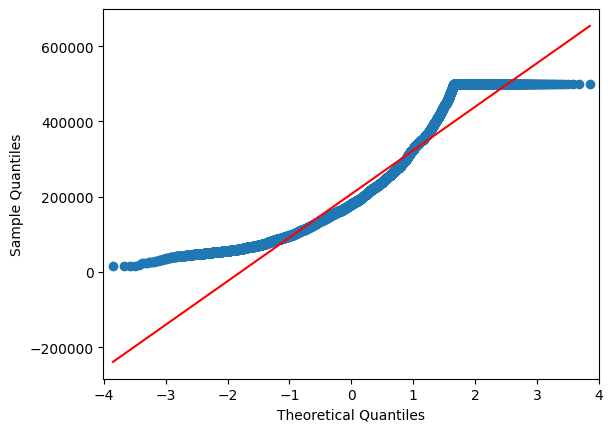

In [101]:
sm.qqplot(df['median_house_value'], line='s');

se comporta de manera normal, por lo que podemos continuar con las pruebas paramétricas

Ho: casa más cercana una escuela o hospital no hay diferencia significativa del precio si es más lejana. (casa cerca media_price = casa lejos media_price)
H1: casa más cercana una escuela o hospital tiene diferencia significativa del precio si es más lejana. (casa lejos media_price < casa cerca media_price)



Veamos las distancia de las casas a la escuela y al hospital con la función euclidiana:

In [53]:
escuela = (-118, 34)
hospital = (-122, 37)

def calcular_distancia(lon, lat, punto):
    return np.sqrt((lon - punto[0])**2 + (lat - punto[1])**2)

In [54]:
df['dist_escuela'] = calcular_distancia(df['longitude'], df['latitude'], escuela)
df['dist_hospital'] = calcular_distancia(df['longitude'], df['latitude'], hospital)

In [55]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,dist_escuela,dist_hospital
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3.694888,8.187319
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3.552591,7.966235
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3.453940,8.143077
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3.448840,8.154416
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,3.456848,8.183508


Ahora que tenemos las distancias de las escuelas y los hospitales a cada casa, podemos etiquetar las casas que están cerca de alguno de ellos. Consideramos que una casa está cerca si la distancia es menor a 0.50

In [93]:
df['esta_cerca'] = (df['dist_escuela'] < 0.50) | (df['dist_hospital'] < 0.50)

In [57]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,dist_escuela,dist_hospital,esta_cerca
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3.694888,8.187319,False
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3.552591,7.966235,False
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3.453940,8.143077,False
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3.448840,8.154416,False
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,3.456848,8.183508,False


Ahora que tenemos las dos muestras, podemos aplicar la prueba t de Student para comparar las medias de las dos muestras para ver si hay diferencia en el precio de las casas cerca y lejos de escuelas y hospitales.

In [84]:
muestra_cerca = df[df['esta_cerca'] == True]['median_house_value']
muestra_lejos = df[df['esta_cerca'] == False]['median_house_value']

In [86]:
muestra_cerca.mean()

np.float64(246951.98213501245)

In [75]:
muestra_lejos.mean()

np.float64(180678.44105790975)

In [87]:
resultado = st.ttest_ind(muestra_cerca, muestra_lejos,equal_var=False)

In [88]:
print(f"p-valor: {resultado.pvalue}")

p-valor: 3.0064957768591797e-301


Como el valor es menor que 0.05, rechazamos la hipótesis nula. Concluimos que las casas cerca de escuelas y hospitales no tienen un precio igual que las casas lejos de ellos.

Conlusión casas cerca tienen precio mayor que casas lejos.